In [1]:
import json
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
DATA_FILES = [
    'ITiCSE18.json', 
    'ITiCSE19.json', 
    'ITiCSE20.json', 
    'SIGCSE18.json', 
    'SIGCSE19.json', 
    'SIGCSE20.json',
    'FIE18.json', 
    'FIE19.json',
]

In [4]:
# Load data
author_affiliations = {}
all_papers = []
for filename in DATA_FILES:
    venue = os.path.splitext(os.path.basename(filename))[0]
    year = int(venue[-2:]) + 2000
    with open(filename) as f:
        papers = json.load(f)
    for paper in papers:
        authors = []
        affiliations = []
        for author in paper['authors']:
            # TODO check if any author changed affiliations. Yep, that happens...
            name = author['name']
            affiliation = author['affiliation']
            author_affiliations[name] = affiliation
            authors.append(name)
            affiliations.append(affiliation)
        paper['authors'] = authors
        paper['affiliations'] = affiliations
        paper['venue'] = venue
        paper['year'] = year
        all_papers.append(paper)
papers = pd.DataFrame(all_papers)
papers.head()

title  \
0  Dancing rainbots: computing education with gir...   
1  A new era towards more engaging and human-like...   
2  Improving complex task performance using a seq...   
3  Syntax error based quantification of the learn...   
4  Programming: predicting student success early ...   

                                             link  \
0  https://dl.acm.org/doi/10.1145/3197091.3211885   
1  https://dl.acm.org/doi/10.1145/3197091.3211886   
2  https://dl.acm.org/doi/10.1145/3197091.3197141   
3  https://dl.acm.org/doi/10.1145/3197091.3197121   
4  https://dl.acm.org/doi/10.1145/3197091.3197101   

                                            abstract  \
0  We want women and girls to participate, thrive...   
1  Engagement of learners in computer-based tutor...   
2  Online coding tools are an increasingly common...   
3  Recent data-driven research has produced metri...   
4  This paper describes a large, multi-institutio...   

                                             authors  \
0                                   [Judy Robertson]   
1                                     [Maria Virvou]   
2  [Andrew Luxton-Reilly, Michelle Craig, Paul De...   
3    [Luke Mathieson, Alireza Ahadi, Raymond Lister]   
4                       [Keith Quille, Susan Bergin]   

                                                tags  \
0          [barriers, inclusion, Women in computing]   
1  [personalisation, artificial intelligence, Com...   
2  [assessment, compound assessment, novice progr...   
3  [programming, student mistakes, syntactic erro...   
4  [CS1, Programming, Predictors, Success, Comput...   

                                        affiliations     venue  year  
0                      [University of Edinburgh, UK]  ITiCSE18  2018  
1                    [University of Piraeus, Greece]  ITiCSE18  2018  
2  [University of Auckland, New Zealand, Universi...  ITiCSE18  2018  
3  [University of Technology Sydney, Australia, U...  ITiCSE18  2018  
4  [Institute of Technology Tallaght, Ireland / M...  ITiCSE18  2018

In [5]:
# Define functions
def find_keywords(keywords):
    def find(row):
        search_str = row.title.lower() + row.abstract.lower() + ''.join(t.lower() for t in row.tags)
        for word in keywords:
            if word in search_str:
                return 1
        return 0
    return find


def papers_with_keywords_percent(papers, keywords):
    found = papers.apply(find_keywords(keywords), axis=1).sum()
    return 100 * found / len(papers)


def sort_by_occurrence(values, decreasing=True):
    c = Counter(values)
    return sorted(((count, v) for v, count in c.items()), reverse=decreasing)

# Counting some keywords

In [16]:
search_keywords = [
    ['automatic', 'automated'],
    ['project'],
    ['assess'],
    ['peer'],
    ['review'],
    ['code'],
    ['test'],
]
years = sorted(papers.year.unique())
for keywords in search_keywords:
    print(f'KEYWORDS: {", ".join(keywords)}')
    for year in years:
        papers_by_year = papers[papers.year == year]
        print(f'{year}: {papers_with_keywords_percent(papers_by_year, keywords):.2f}% of the papers include the keywords')
    print()

KEYWORDS: automatic, automated
2018: 5.22% of the papers include the keywords
2019: 5.01% of the papers include the keywords
2020: 6.05% of the papers include the keywords

KEYWORDS: project
2018: 25.66% of the papers include the keywords
2019: 21.19% of the papers include the keywords
2020: 16.24% of the papers include the keywords

KEYWORDS: assess
2018: 19.71% of the papers include the keywords
2019: 17.12% of the papers include the keywords
2020: 16.88% of the papers include the keywords

KEYWORDS: peer
2018: 7.15% of the papers include the keywords
2019: 6.58% of the papers include the keywords
2020: 5.41% of the papers include the keywords

KEYWORDS: review
2018: 6.69% of the papers include the keywords
2019: 6.47% of the papers include the keywords
2020: 5.89% of the papers include the keywords

KEYWORDS: code
2018: 11.55% of the papers include the keywords
2019: 14.51% of the papers include the keywords
2020: 15.45% of the papers include the keywords

KEYWORDS: test
2018: 15.86

# Common Author Tags

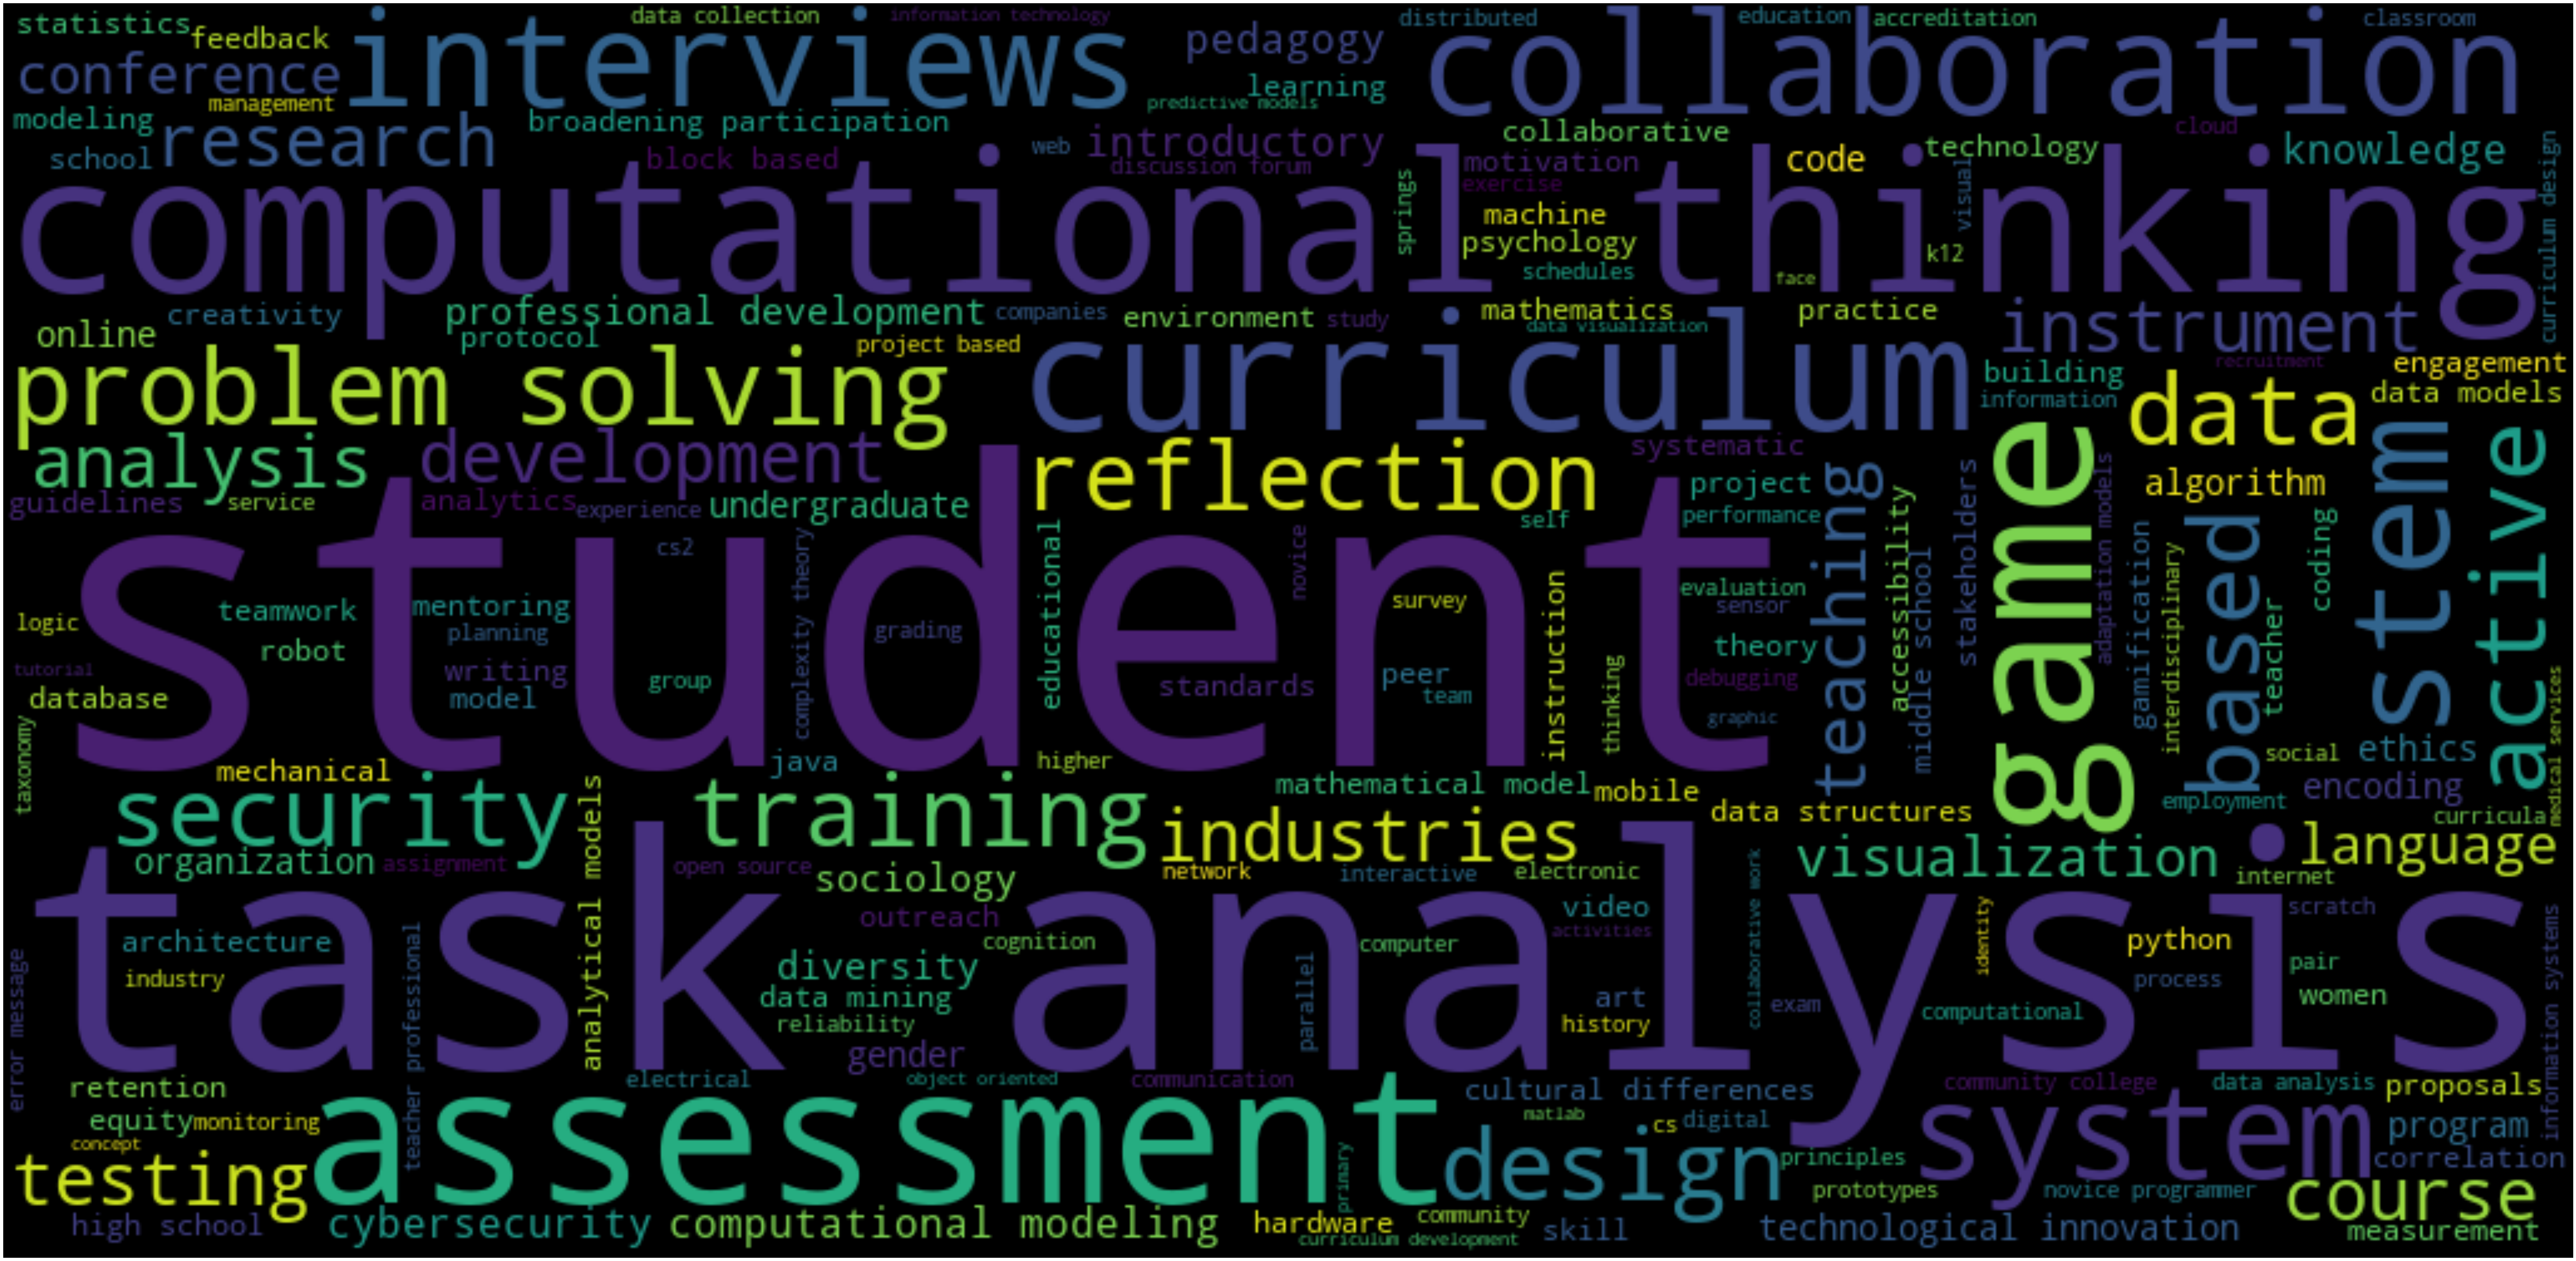

In [47]:
ignore = ['programming', 'education', 'learning', 'computer', 'science', 'computing', 'student', 'cs1', 'tool', 'cs', 'engineering', 'software', 'tools', 'profession']
all_tags = (w.lower().strip() for t in papers.tags.sum() for w in t.split())
all_tags = ' '.join(w for w in all_tags if w not in ignore)
wordcloud = WordCloud(width=1024, height=500).generate(all_tags)
fig, ax = plt.subplots(figsize=(100, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
pass

In [48]:
all_tags = [t.lower() for t in papers.tags.sum()]
for count, tag in sort_by_occurrence(all_tags):
    if count > 20:
        print(f'{tag} ({count} publications)')

education (372 publications)
tools (203 publications)
computer science education (154 publications)
computer science (132 publications)
cs1 (120 publications)
task analysis (119 publications)
programming (107 publications)
engineering profession (105 publications)
engineering education (105 publications)
programming profession (104 publications)
computational thinking (104 publications)
engineering students (100 publications)
software (86 publications)
collaboration (85 publications)
stem (81 publications)
interviews (81 publications)
industries (67 publications)
assessment (67 publications)
active learning (65 publications)
training (61 publications)
reflection (61 publications)
problem-solving (61 publications)
computational modeling (61 publications)
instruments (59 publications)
conferences (59 publications)
computing education (59 publications)
games (58 publications)
sociology (54 publications)
visualization (52 publications)
technological innovation (52 publications)
software en

In [56]:
def filter_tags_by_year(row):
    tags = row.tags
    year = int(row.venue[-2:]) + 2000
    return [{'year': year, 'tag': tag.lower()} for tag in tags]

tags_by_year = pd.DataFrame(papers.apply(filter_tags_by_year, axis=1).sum())
tag_counts = tags_by_year.groupby('tag').count()
popular_tags = list(tag_counts[tag_counts.year > 10].index)
tags_by_year = tags_by_year[tags_by_year.tag.isin(popular_tags)]
tby = tags_by_year.groupby(['tag', 'year']).year.count().unstack().fillna(0)
tby[tby[2018] < tby[2020]]

year                              2018  2019  2020
tag                                               
accessibility                      6.0   9.0  10.0
assessment                        18.0  26.0  23.0
autograding                        5.0   2.0   6.0
block-based programming            3.0   5.0   9.0
broadening participation           7.0  14.0  13.0
computational thinking            29.0  38.0  37.0
computing education               16.0  20.0  23.0
cs2                                7.0   8.0   8.0
curriculum                        10.0  18.0  18.0
cybersecurity education            8.0   9.0   9.0
debugging                          7.0   7.0   8.0
diversity                         13.0  11.0  14.0
educational data mining            2.0   2.0   7.0
equity                             8.0  12.0  14.0
feedback                           2.0   4.0   5.0
gamification                       3.0  11.0   6.0
gender                            10.0  12.0  12.0
gender and diversity               2.0   4.0   5.0
k-12                              10.0  14.0  19.0
novice programmers                 5.0   7.0   7.0
problem solving                    1.0   8.0   4.0
robotics                           3.0   4.0   4.0
scratch                            6.0   4.0   7.0
student engagement                 5.0   8.0   7.0
teacher professional development   5.0   2.0   6.0
teaching                           4.0   6.0   6.0

# Authors

In [13]:
for count, name in sort_by_occurrence(papers.authors.sum()):
    if count > 5:
        print(f'{name} ({count} publications)') 

Brett A. Becker (20 publications)
Tiffany Barnes (19 publications)
Monica M. McGill (19 publications)
Leo Porter (19 publications)
Kristy Elizabeth Boyer (19 publications)
Christina Gardner-McCune (16 publications)
Arto Hellas (16 publications)
Adrienne Decker (16 publications)
Allison Godwin (15 publications)
Roberto A. Bittencourt (14 publications)
Colleen M. Lewis (14 publications)
Nicholas Lytle (13 publications)
Mohsen Dorodchi (13 publications)
Diana Franklin (13 publications)
S. Monisha Pulimood (12 publications)
Dan Garcia (12 publications)
Cynthia Taylor (12 publications)
Andrew Petersen (12 publications)
Robert M. Capraro (10 publications)
Richard E. Ladner (10 publications)
Regina Barwaldt (10 publications)
Matthew Peveler (10 publications)
Lina Battestilli (10 publications)
Leigh Ann DeLyser (10 publications)
Juho Leinonen (10 publications)
Evan Maicus (10 publications)
Eric Wiebe (10 publications)
Clifford A. Shaffer (10 publications)
Barbara Cutler (10 publications)
Ankur